# Models comparison and conclusion

**Import libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utils import *

### Comparison of the metrics

**The metrics of each model**

Organize the metrics of each model in a dictionary

In [25]:
dic={
'LinearRegression': {
'Train set':
{'r2_score': 0.8509728173767069, 'MSE': 52.41993356822764, 'RMSE': 7.240161156233171, 'NMSE': 0.013107461066154206}
,'Test set':
{'r2_score': 0.8409277832842572, 'MSE': 52.09309754904043, 'RMSE': 7.217554817875679, 'NMSE': 0.017792183457083922}  
} 
,'RandForest':{
'Train set':
{'r2_score': 0.9999009769749209, 'MSE': 0.03483109795810131, 'RMSE': 0.18663091372573118, 'NMSE': 8.709420811893875e-06}
,'Test set':
{'r2_score': 0.8775015737002211, 'MSE': 40.1158832295746, 'RMSE': 6.333710068322878, 'NMSE': 0.013701415111505402}
}
,'DNN': {
'Train set':
{'r2_score': 0.9319059301052521, 'MSE': 23.95176822640016, 'RMSE': 4.8940543750963945, 'NMSE': 0.005988927218422694}
,'Test set':
{'r2_score': 0.8455059571217549, 'MSE': 50.596522986960906, 'RMSE': 7.113123293389544, 'NMSE': 0.01728099215889291}
}
,'LSTM':{
'Train set':
{'r2_score': 0.9668431402709771, 'MSE': 11.651057054092657, 'RMSE': 3.41336447718269, 'NMSE': 0.0029121275239807}
,'Test set':
{'r2_score': 0.9195336751782257, 'MSE': 26.34358586713694, 'RMSE': 5.13260030268644, 'NMSE': 0.008986687432743007}
}
,'LSTM_session':{
'Train set':
{'r2_score': 0.9670497054302775, 'MSE': 11.1632160396884, 'RMSE': 3.3411399311744487, 'NMSE': 0.0027476483309007817}
,'Test set':
{'r2_score': 0.9211842386327109, 'MSE': 25.63767626638323, 'RMSE': 5.063366100370704, 'NMSE': 0.008630940925311264}
}
}

**Prepare the data Frame**

In [26]:
df_comp = pd.DataFrame.from_dict({(i,j): dic[i][j] 
                           for i in dic.keys() 
                           for j in dic[i].keys()},
                       orient='index')

df_comp

r2_score        MSE      RMSE      NMSE
LinearRegression Train set  0.850973  52.419934  7.240161  0.013107
                 Test set   0.840928  52.093098  7.217555  0.017792
RandForest       Train set  0.999901   0.034831  0.186631  0.000009
                 Test set   0.877502  40.115883  6.333710  0.013701
DNN              Train set  0.931906  23.951768  4.894054  0.005989
                 Test set   0.845506  50.596523  7.113123  0.017281
LSTM             Train set  0.966843  11.651057  3.413364  0.002912
                 Test set   0.919534  26.343586  5.132600  0.008987
LSTM_session     Train set  0.967050  11.163216  3.341140  0.002748
                 Test set   0.921184  25.637676  5.063366  0.008631

**Only Train set**

In [27]:
df_comp_train=df_comp.loc[(slice(None), 'Train set'), :]
df_comp_train

,,r2_score,MSE,RMSE,NMSE
LinearRegression,Train set,0.850973,52.419934,7.240161,0.013107
RandForest,Train set,0.999901,0.034831,0.186631,0.000009
DNN,Train set,0.931906,23.951768,4.894054,0.005989
LSTM,Train set,0.966843,11.651057,3.413364,0.002912
LSTM_session,Train set,0.967050,11.163216,3.341140,0.002748


**Only Test set**

In [28]:
df_comp_test=df_comp.loc[(slice(None), 'Test set'), :]
df_comp_test

,,r2_score,MSE,RMSE,NMSE
LinearRegression,Test set,0.840928,52.093098,7.217555,0.017792
RandForest,Test set,0.877502,40.115883,6.333710,0.013701
DNN,Test set,0.845506,50.596523,7.113123,0.017281
LSTM,Test set,0.919534,26.343586,5.132600,0.008987
LSTM_session,Test set,0.921184,25.637676,5.063366,0.008631


**Metric plots**

In [29]:
dfplot=df_comp['r2_score'].to_frame().reset_index(names=['models','train_test'])
dfplot

,models,train_test,r2_score
0,LinearRegression,Train set,0.850973
1,LinearRegression,Test set,0.840928
2,RandForest,Train set,0.999901
3,RandForest,Test set,0.877502
4,DNN,Train set,0.931906
5,DNN,Test set,0.845506
6,LSTM,Train set,0.966843
7,LSTM,Test set,0.919534
8,LSTM_session,Train set,0.967050
9,LSTM_session,Test set,0.921184


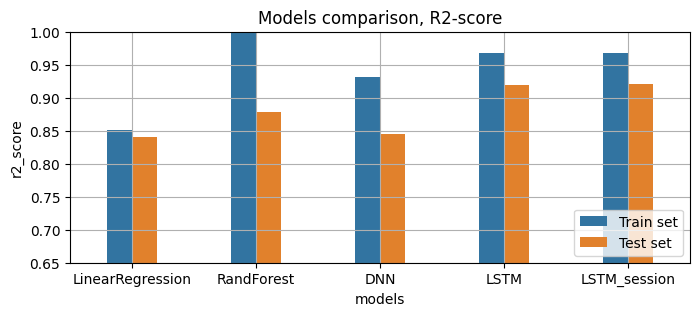

In [30]:
# Create sns bar plot
plt.figure(figsize=(8, 3))
sns.barplot(x='models', y='r2_score', hue='train_test', data=dfplot,width=0.4)
plt.legend( loc='lower right')
plt.grid()
plt.ylim([0.65,1])
plt.title("Models comparison, R2-score")
plt.show()

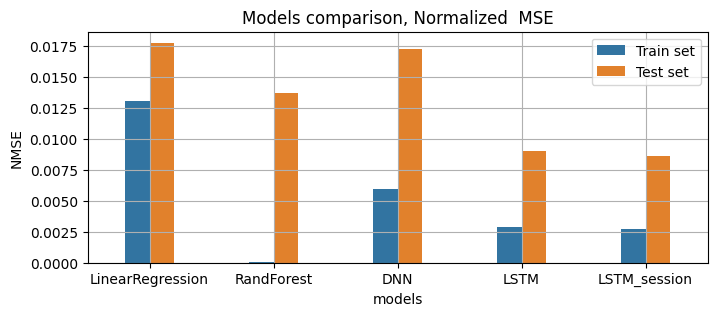

In [31]:
dfplot=df_comp['NMSE'].to_frame().reset_index(names=['models','train_test'])
# Create sns bar plot
plt.figure(figsize=(8, 3))
sns.barplot(x='models', y='NMSE', hue='train_test', data=dfplot,width=0.4)
plt.legend( loc='upper right')
plt.grid()
#plt.ylim([0.65,1])
plt.title("Models comparison, Normalized  MSE")
plt.show()

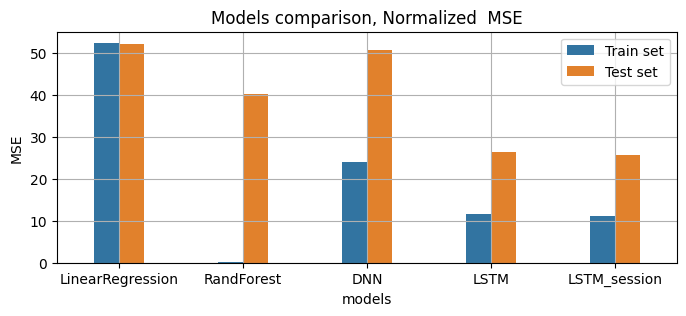

In [32]:
dfplot=df_comp['MSE'].to_frame().reset_index(names=['models','train_test'])
# Create sns bar plot
plt.figure(figsize=(8, 3))
sns.barplot(x='models', y='MSE', hue='train_test', data=dfplot,width=0.4)
plt.legend( loc='upper right')
plt.grid()
#plt.ylim([0.65,1])
plt.title("Models comparison, Normalized  MSE")
plt.show()

### The comparison of error mean/std of each model

Organize the error mean/std of each model in a dictionary

In [33]:
dic={
'LinearRegression': 
    {'test': {'mean': -1.9822191989024145, 'std': 6.940021944961204}, 'train': {'mean': 4.4405223213114105e-14, 'std': 7.24016115623317}}
,'RandForest':
    {'test': {'mean': -1.0235385796178915, 'std': 6.250460143510107}, 'train': {'mean': -0.00014658345299136245, 'std': 0.1866308561610128}}
,'DNN': 
    {'test': {'mean': -1.7818939510828322, 'std': 6.886318097071564}, 'train': {'mean': -0.6292989497877967, 'std': 4.853426733576612}}
,'LSTM':
    {'test': {'mean': -1.6058626449807745, 'std': 4.874914464130862}, 'train': {'mean': -1.2347944542939768, 'std': 3.1821910234518445}}
,'LSTM_session':
    {'test': {'mean': -1.5537948017744347, 'std': 4.8190660900595645}, 'train': {'mean': -1.1761755081762932, 'std': 3.1272715286099864}}
}

**Prepare the data Frame**

In [34]:
# dict => df
df_comp = pd.DataFrame.from_dict({(i,j): dic[i][j] 
                           for i in dic.keys() 
                           for j in dic[i].keys()},
                       orient='index')
#calcul 3*sdt of each model 
df_comp['_3_sdt']=df_comp['std']*3
df_comp

mean       std     _3_sdt
LinearRegression test  -1.982219e+00  6.940022  20.820066
                 train  4.440522e-14  7.240161  21.720483
RandForest       test  -1.023539e+00  6.250460  18.751380
                 train -1.465835e-04  0.186631   0.559893
DNN              test  -1.781894e+00  6.886318  20.658954
                 train -6.292989e-01  4.853427  14.560280
LSTM             test  -1.605863e+00  4.874914  14.624743
                 train -1.234794e+00  3.182191   9.546573
LSTM_session     test  -1.553795e+00  4.819066  14.457198
                 train -1.176176e+00  3.127272   9.381815

**Why 3 STD of the error?**

In [35]:
for n_std in range(1,7):
    x=np.linspace(-n_std,n_std,10000)
    pdf=norm_pdf(x, mean=0, std=1)
    print('> the population covered by -', n_std, 'and +', n_std, 'STD is', \
          '{:.7f}'.format(100*np.trapz(y=pdf, x=x)) ,'%')
    

> the population covered by - 1 and + 1 STD is 68.2689491 %
> the population covered by - 2 and + 2 STD is 95.4499733 %
> the population covered by - 3 and + 3 STD is 99.7300203 %
> the population covered by - 4 and + 4 STD is 99.9936657 %
> the population covered by - 5 and + 5 STD is 99.9999427 %
> the population covered by - 6 and + 6 STD is 99.9999998 %


+/- 3 SDT cover 99.73% of the population

**Only Test set**

In [36]:
df_comp_train=df_comp.loc[(slice(None), 'test'), :]
df_comp_train

,,mean,std,_3_sdt
LinearRegression,test,-1.982219,6.940022,20.820066
RandForest,test,-1.023539,6.250460,18.751380
DNN,test,-1.781894,6.886318,20.658954
LSTM,test,-1.605863,4.874914,14.624743
LSTM_session,test,-1.553795,4.819066,14.457198


In [37]:
dfplot=df_comp_train['_3_sdt'].to_frame().reset_index(names=['models','train_test'])
dfplot

,models,train_test,_3_sdt
0,LinearRegression,test,20.820066
1,RandForest,test,18.751380
2,DNN,test,20.658954
3,LSTM,test,14.624743
4,LSTM_session,test,14.457198


**Plot 3 STD error of each models**

In [38]:
dfplot=df_comp['_3_sdt'].to_frame().reset_index(names=['models','train_test'])
dfplot.head()

,models,train_test,_3_sdt
0,LinearRegression,test,20.820066
1,LinearRegression,train,21.720483
2,RandForest,test,18.751380
3,RandForest,train,0.559893
4,DNN,test,20.658954


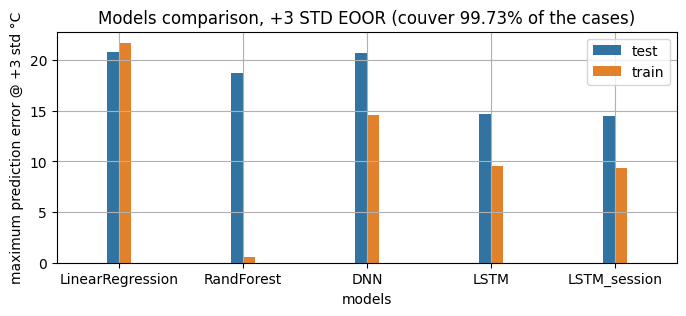

In [24]:
# Create sns bar plot
plt.figure(figsize=(8, 3))
sns.barplot(x='models', y='_3_sdt', hue='train_test', data=dfplot,width=0.2)
plt.legend( loc='upper right')
plt.grid()
plt.ylabel('maximum prediction error @ +3 std °C')
plt.title("Models comparison, +3 STD EOOR (couver 99.73% of the cases)")
plt.show()

### Conclusion

The LSTM model is the best estimator, the difference between the first LSTM and LSTM_session is very small. 
<br> 
We can see also that the RandomForest overfit the train set.
<br> 
Since we predict a temperature from time series, the best model is a recurrent model, because the temperature at the time "t" depend to stat of the past. for example if the inertia time is 10min, the ideal model will be a model that take in account at least 10 min past data to predict the temperature. 
<br> 
Even with the LSTM model, the prediction is not very accurate in this projet. we can see above that the error at +/-3 STD is +/-14.5°C, this error is heigh. 
<br> 
The next step will be to tune the hyperparameters of the LSTM and to tray other recurrent model such the RNN (Recurrent Neural Network) and the GRU (Gated recurrent units)